In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
movies_df = pd.read_csv("movies.csv")
tags_df = pd.read_csv("tags.csv")
links_df = pd.read_csv("links.csv")

In [3]:
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [4]:
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [52]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
ratings_df = pd.read_csv("ratings.csv")
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
#2. Shape of movies.csv

print(f'Shape of movies.csv file is: {movies_df.shape}')

Shape of movies.csv file is: (9742, 3)


In [8]:
#3. Shape of ratings.csv 

print(f'Shape of ratings.csv file is:{ratings_df.shape}')

Shape of ratings.csv file is:(100836, 4)


In [9]:
# How many unique "userId" are available in "ratings.csv

print(f" No of unique values in ratings.csv file is : {len(ratings_df['userId'].unique())}")

 No of unique values in ratings.csv file is : 610


In [10]:
ratings_df['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [11]:
ratings_df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

# Q. Which movie has recieved maximum number of user ratings?



In [12]:
merge_df = pd.merge(movies_df, ratings_df, on="movieId", how="inner")
merge_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [57]:
high_rated = merge_df.groupby('title')['rating'].count().idxmax()
print(f"movie has recieved maximum number of user ratings is:{high_rated}")

movie has recieved maximum number of user ratings is:Forrest Gump (1994)


# Q. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
movie_tags = pd.merge(tags_df,movies_df, on ="movieId")
movie_tags

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,62,60756,comedy,1528934384,Step Brothers (2008),Comedy
4,62,60756,funny,1528934381,Step Brothers (2008),Comedy
...,...,...,...,...,...,...
3678,606,5694,70mm,1175638092,Staying Alive (1983),Comedy|Drama|Musical
3679,606,6107,World War II,1178473747,Night of the Shooting Stars (Notte di San Lore...,Drama|War
3680,606,7936,austere,1173392334,Shame (Skammen) (1968),Drama|War
3681,610,3265,gun fu,1493843984,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller


In [15]:
matrix_tags = movie_tags[movie_tags["title"] == "Matrix, The (1999)"]
matrix_tags['tag'].unique()
print(f" tags submitted by users for The Matrix movie are:{matrix_tags['tag'].unique()}")

 tags submitted by users for The Matrix movie are:['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


# Q.What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?


In [16]:
terminator = merge_df[merge_df["title"] == "Terminator 2: Judgment Day (1991)"]
terminator['rating'].mean()

3.970982142857143

# Q.How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<AxesSubplot:ylabel='Frequency'>

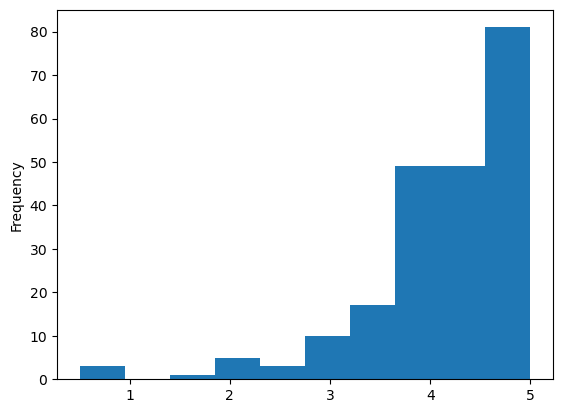

In [17]:
fight_club = merge_df[merge_df["title"] == "Fight Club (1999)"]
fight_club['rating'].plot(kind='hist')

### This is `Left Skewed Distribution`










Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

Step 1:
Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 

In [18]:
group_rating = ratings_df.groupby('movieId')['rating'].agg(['count','mean']).reset_index()
group_rating

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


 Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [19]:
movie_rating_df = pd.merge(movies_df,group_rating, on = "movieId", how="inner")
movie_rating_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


 Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [20]:
filtered_movies = movie_rating_df[movie_rating_df['count'] > 50]
filtered_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Q.Which movie is the most popular based on  average user ratings?


In [21]:
max_rated_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]
print(f'The maximum rated movie is:{max_rated_movie}')


The maximum rated movie is:movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object


#### The maximum rated movie is `Shawshank Redemption`

# Q. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [22]:
filtered_movies.sort_values(by="count", ascending=False).head(5)

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


# Q.Which Sci-Fi movie is "third most popular" based on the number of user ratings?


In [59]:
sci_fi = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')].sort_values(by="count", ascending=False)
sci_fi.iloc[2]

movieId                                 480
title                  Jurassic Park (1993)
genres     Action|Adventure|Sci-Fi|Thriller
count                                   238
mean                                   3.75
Name: 418, dtype: object

In [24]:
from bs4 import BeautifulSoup
import requests

In [25]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class': 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [27]:
link_filtered['imdb'] = link_filtered['imdbId'].apply(scrapper)

In [28]:
link_filtered

,movieId,title,genres,count,mean,imdbId,tmdbId,imdb
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


# Q. Mention the movieId of the movie which has the highest IMDB rating.


In [51]:
link_filtered.sort_values(by='imdb', ascending=False).head(1)

,movieId,title,genres,count,mean,imdbId,tmdbId,imdb
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3


MovieId with highest number of imdb rating is `318`

# QMention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [49]:
scifi_movies = link_filtered[link_filtered['genres'].str.contains('Sci-Fi')]
scifi_movies.sort_values(by="imdb", ascending=False).head(1)

,movieId,title,genres,count,mean,imdbId,tmdbId,imdb
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8


Highest imdb rated sci-fi movieId is `79132`